Done by Albert Adiputra

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
data = pd.read_csv('/content/drive/My Drive/customer_trend.csv')

Mounted at /content/drive


What defines a high-value customer and how many customers are categorised as such


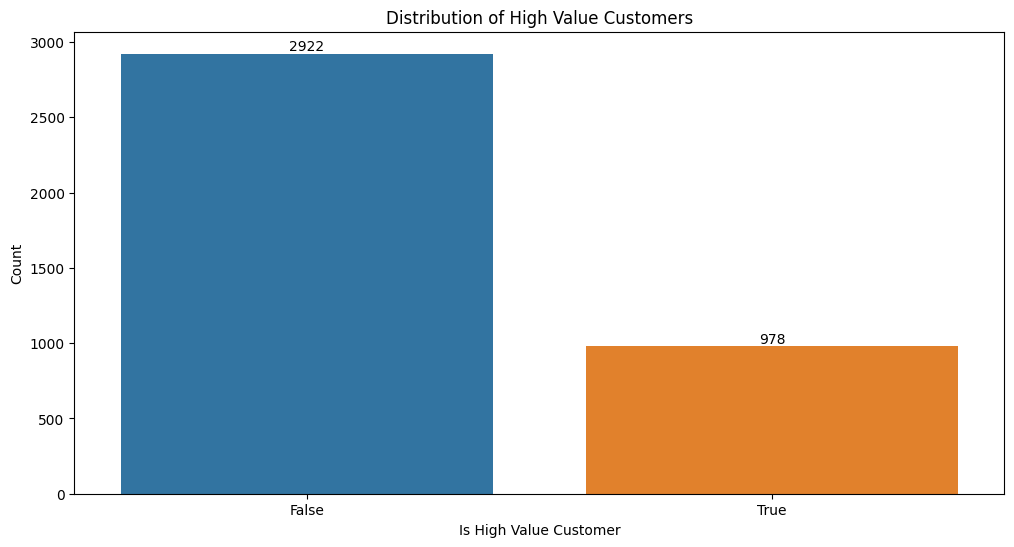

In [ ]:
# Calculating total purchase amount per customer
data['Total Purchase Amount'] = data.groupby('Customer ID')['Purchase Amount (USD)'].transform('sum')

# Defining high-value customers: top 25% in terms of total purchase amount
high_value_threshold = data['Total Purchase Amount'].quantile(0.75)
data['High Value'] = data['Total Purchase Amount'] >= high_value_threshold

# Creating the plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='High Value', data=data)
plt.title('Distribution of High Value Customers')
plt.xlabel('Is High Value Customer')
plt.ylabel('Count')

# Adding value annotations to the bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center',
                va='bottom')

plt.show()

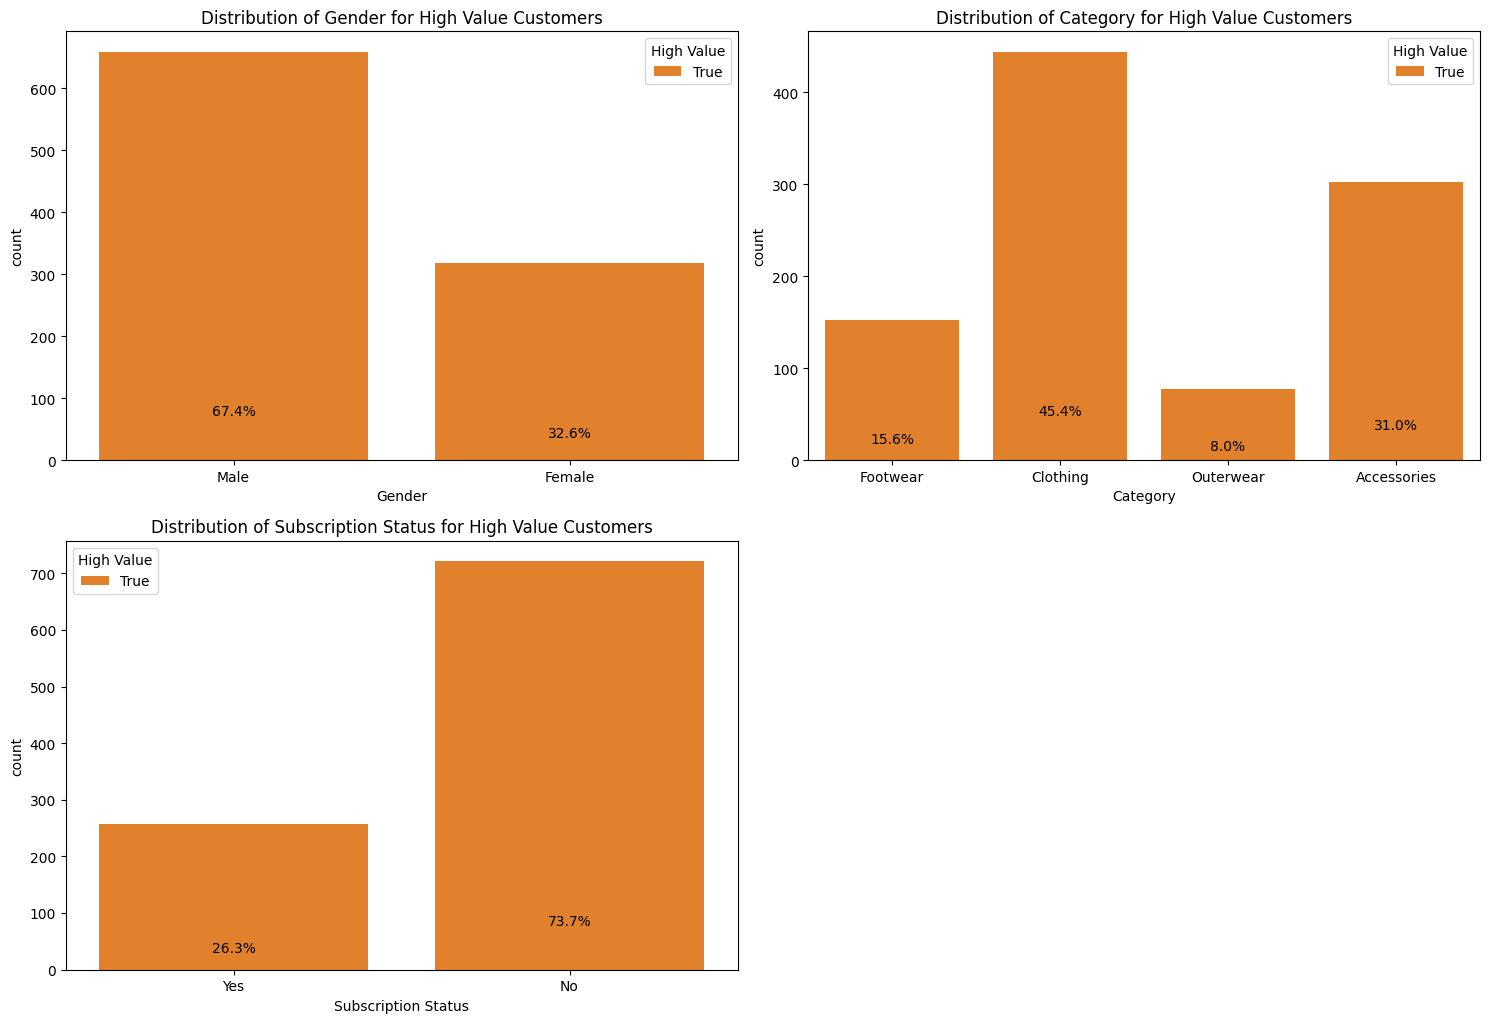

In [ ]:
#Filtering dataset for high value customers
high_value_data = data[data['High Value']]
features = ['Gender', 'Category', 'Subscription Status']

#Setting up figure
plt.figure(figsize=(15, 15))

#Creating countplots for each feature
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    ax = sns.countplot(data=high_value_data, x=feature, hue='High Value', palette=["tab:orange", "blue"])
    plt.title(f'Distribution of {feature} for High Value Customers')

    # Adding percentage annotations to each bar
    for p in ax.patches:
        percentage = p.get_height() / 978 * 100 # Calculate the percentage of the total (978)

        if height > 0:  # Check if the height of the bar is greater than zero
            # Annotate each bar with its respective percentage
            ax.annotate(
                f'{round(percentage, 1)}%',  # Text to be displayed (rounded percentage value with '%' sign)
                (p.get_x() + p.get_width() / 2., percentage),  # Position for the annotation
                ha='center',  # Horizontal alignment of the text ('center' aligns the text to the center of the specified x position)
                va='bottom'  # Vertical alignment ('bottom' aligns the text to the bottom of the specified y position, effectively placing it above the bar)
            )


plt.tight_layout()
plt.show()

What is the percentage of high-value customers for each group of each category when compared to other high-value customers

In [ ]:
total_high_value_customers = data['High Value'].sum()

# Segment and sort data values of 'Age' into groups of 10 years
data['Age Group'] = pd.cut(data['Age'], bins=range(0, 101, 10), right=False)

# Function to calculate proportions
def calculate_proportions(df, category):
    #Group the DataFrame df by two columns - the specified category and 'High Value'.
      #Compute the size of each group.
        #Reshapes the resulting grouped data into a DataFrame format where each row represents a unique value from the category and columns represent the 'High Value' status (True or False).
          #Replace missing values with 0 in the resulting unstacked DataFrame
    category_counts = df.groupby([category, 'High Value']).size().unstack(fill_value=0)
    #Calculate the proportion of each category's high-value customers as a percentage of the total number of high-value customers.
    category_counts['Proportion of High Value Customers (%)'] = (category_counts[True] / total_high_value_customers) * 100
    return category_counts

# Applying the function to each category
age_group_proportions = calculate_proportions(data, 'Age Group')
gender_proportions = calculate_proportions(data, 'Gender')
category_proportions = calculate_proportions(data, 'Category')
location_proportions = calculate_proportions(data, 'Location')
review_rating_proportions = calculate_proportions(data, 'Review Rating')
subscription_status_proportions = calculate_proportions(data, 'Subscription Status')

# Displaying the results
(age_group_proportions, gender_proportions, category_proportions, location_proportions, review_rating_proportions, subscription_status_proportions)


(High Value  False  True  Proportion of High Value Customers (%)
 Age Group                                                      
 [0, 10)         0     0                                0.000000
 [10, 20)      114    36                                3.680982
 [20, 30)      540   188                               19.222904
 [30, 40)      540   184                               18.813906
 [40, 50)      573   166                               16.973415
 [50, 60)      572   199                               20.347648
 [60, 70)      529   192                               19.631902
 [70, 80)       54    13                                1.329243
 [80, 90)        0     0                                0.000000
 [90, 100)       0     0                                0.000000,
 High Value  False  True  Proportion of High Value Customers (%)
 Gender                                                         
 Female        929   319                               32.617587
 Male         1993   659

What is the percentage of high-value customers for each group of each category when compared to every customer

In [ ]:
#Function to calculate the percentage of high-value customers for each category
def calculate_high_value_ratios(df, category):
    # Grouping by category and High Value status, and calculating the size of each group
    category_counts = df.groupby([category, 'High Value']).size().unstack(fill_value=0)
    # Calculating the percentage of high-value to total customers
    category_counts['High Value Percentage'] = category_counts[True] / data['Customer ID'].count() * 100
    return category_counts

# Applying the function to each category
age_group_ratios = calculate_high_value_ratios(data, 'Age Group')
gender_ratios = calculate_high_value_ratios(data, 'Gender')
category_ratios = calculate_high_value_ratios(data, 'Category')
location_ratios = calculate_high_value_ratios(data, 'Location')
review_rating_ratios = calculate_high_value_ratios(data, 'Review Rating')
subscription_status_ratios = calculate_high_value_ratios(data, 'Subscription Status')

# Displaying the results
(age_group_ratios, gender_ratios, category_ratios, location_ratios, review_rating_ratios, subscription_status_ratios)


(High Value  False  True  High Value Percentage
 Age Group                                     
 [0, 10)         0     0               0.000000
 [10, 20)      114    36               0.923077
 [20, 30)      540   188               4.820513
 [30, 40)      540   184               4.717949
 [40, 50)      573   166               4.256410
 [50, 60)      572   199               5.102564
 [60, 70)      529   192               4.923077
 [70, 80)       54    13               0.333333
 [80, 90)        0     0               0.000000
 [90, 100)       0     0               0.000000,
 High Value  False  True  High Value Percentage
 Gender                                        
 Female        929   319               8.179487
 Male         1993   659              16.897436,
 High Value   False  True  High Value Percentage
 Category                                       
 Accessories    937   303               7.769231
 Clothing      1293   444              11.384615
 Footwear       446   153         